In [1]:
import torch
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from torch import nn
from torch import optim

In [2]:
def accuracy(y_true, y_pred):
    correct=torch.eq(y_true, y_pred).sum().item()
    acc=(correct/len(y_pred)) * 100
    return acc

In [3]:
import requests
from pathlib import Path
if Path("helper_function.py").is_file():
    print("helper_function.py path already exist")
else:
    print("Downloading helper_function.py")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py", "wb") as f:
        f.write(request.content)
from helper_function import plot_predictions, plot_decision_boundary

In [4]:
Random_seed=42
torch.manual_seed(Random_seed)
torch.cuda.manual_seed(Random_seed)

In [5]:
X_blob, y_blob= datasets.make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=Random_seed, return_centers=False)

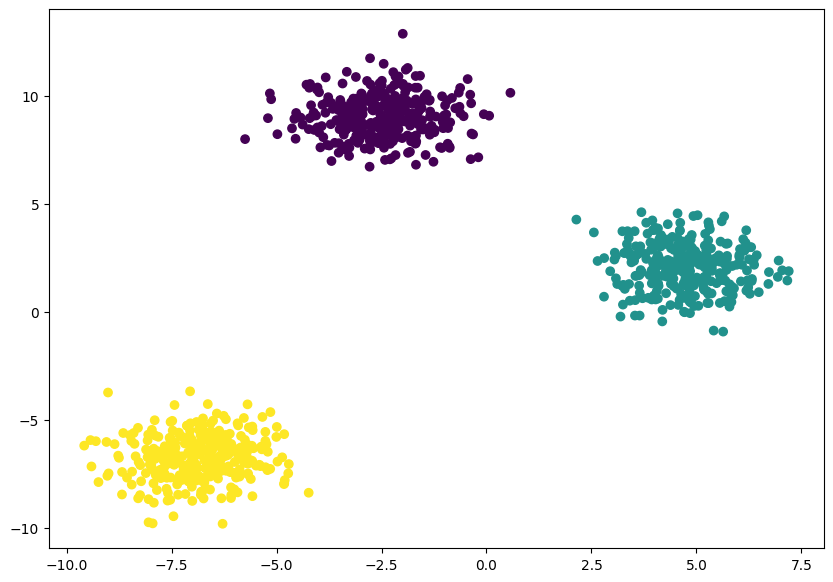

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob)

In [7]:
X_blob = torch.tensor(X_blob)
y_blob = torch.tensor(y_blob)

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X_blob, y_blob, random_state=Random_seed)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([750, 2]),
 torch.Size([750]),
 torch.Size([250, 2]),
 torch.Size([250]))

In [10]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [11]:
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

In [12]:
# Creating the model
class Multiclassv1(nn.Module):
    def __init__(self):
        super().__init__()
        self.L1=nn.Linear(in_features=2, out_features=10)
        self.L2=nn.Linear(in_features=10, out_features=10)
        self.L3=nn.Linear(in_features=10, out_features=3)
        self.R=nn.ReLU()
    def forward(self, X:torch.Tensor) -> torch.Tensor:
        x=self.L1(X)
        x=self.R(x)
        x=self.L2(x)
        x=self.R(x)
        x=self.L3(x)
        return x



In [13]:
model1=Multiclassv1()

In [14]:
model1=model1.to(device)

In [15]:
list(model1.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.1054,  0.3043, -0.2610,

In [16]:
# Defining the loss and optimizer
L=nn.CrossEntropyLoss()
optimizer=optim.Adam(params=model1.parameters(), lr=0.01)

In [19]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#Traing loop
X_train=X_train.float()
y_train=y_train.float()
X_test=X_test.float()
y_test=y_test.float()
epochs=500
for epoch in range(epochs):
    model1.train()
    y_logit=model1(X_train).squeeze()
    y_train_pred= torch.argmax(torch.softmax(y_logit,dim=1),dim=1)
    l=L(y_logit, y_train.long())
    train_acc=accuracy(y_train, y_train_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    model1.eval()
    with torch.inference_mode():
        model1.eval()
        y_test_logit=model1(X_test).squeeze()
        y_test_pred=torch.argmax(torch.softmax(y_test_logit,dim=1),dim=1)
        l_test=L(y_test_logit, y_test.long())
        test_acc=accuracy(y_test, y_test_pred)
    if epoch%10==0:
        print(f"Epoch: {epoch} Train Loss:{l}, Train_acc={train_acc} || Test Loss: {l_test}, Test_acc={test_acc}")


Epoch: 0 Train Loss:1.2458117008209229, Train_acc=32.53333333333333 || Test Loss: 1.1569041013717651, Test_acc=35.6
Epoch: 10 Train Loss:0.7236751317977905, Train_acc=95.06666666666666 || Test Loss: 0.6957105994224548, Test_acc=95.19999999999999
Epoch: 20 Train Loss:0.2985025942325592, Train_acc=100.0 || Test Loss: 0.28010469675064087, Test_acc=100.0
Epoch: 30 Train Loss:0.05511343851685524, Train_acc=100.0 || Test Loss: 0.04561330005526543, Test_acc=100.0
Epoch: 40 Train Loss:0.004568086005747318, Train_acc=100.0 || Test Loss: 0.003539041383191943, Test_acc=100.0
Epoch: 50 Train Loss:0.0010383802000433207, Train_acc=100.0 || Test Loss: 0.0007957273628562689, Test_acc=100.0
Epoch: 60 Train Loss:0.0005870714667253196, Train_acc=100.0 || Test Loss: 0.0004593420890159905, Test_acc=100.0
Epoch: 70 Train Loss:0.00044944448745809495, Train_acc=100.0 || Test Loss: 0.0003453361860010773, Test_acc=100.0
Epoch: 80 Train Loss:0.0003978997119702399, Train_acc=100.0 || Test Loss: 0.0003026137710548

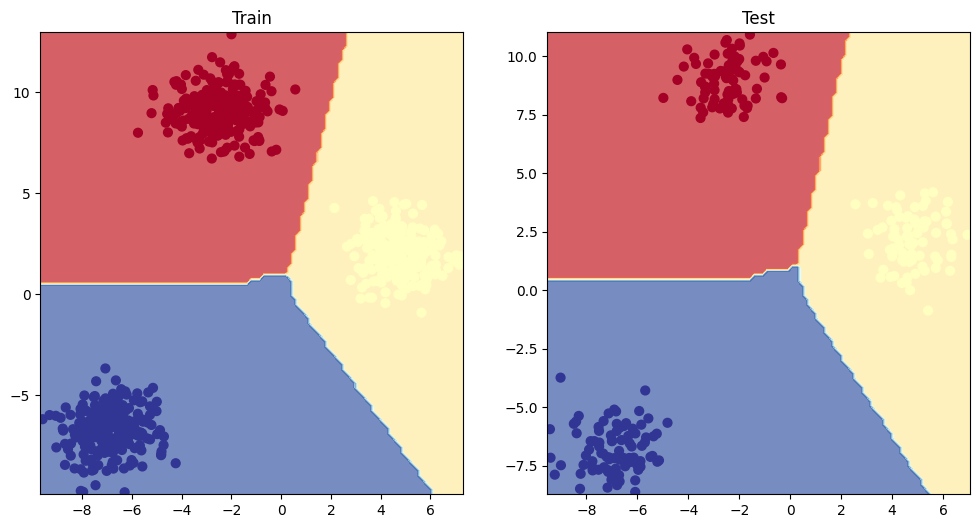

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)


In [28]:
!pip install torcheval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 4.5 MB/s eta 0:00:00


In [31]:
from torcheval.metrics import MulticlassAccuracy
metric = MulticlassAccuracy()
metric.update(y_train_pred, y_train)
print(f"Train_Acc: {metric.compute()}")
metric.update(y_test_pred, y_test)
print(f"Test_Acc: {metric.compute()}")

Train_Acc: 1.0
Test_Acc: 1.0


tensor(0.5000)